# **Task 1: Optimizers**

In this task, you will investigate how different optimizers affect the training behavior.

Pick a architecture of your choice to train on Cifar10.
Train this architecture with different Optimizers and different hyperparameters.
Compare the training curves, e.g. regarding:

    steps until convergence
    training accuracy (or loss) when converged
    stability of training (fluctuation of the curve)
Now choose a different architecture and/or data set and repeat the experiments.
Are the results (qualitatively) still the same? If they are different, discuss potential reasons.

Bonus: Do not only compare visually, but use meaningful quantitative measures for comparison.

## **Cifar10 DataSet and CNN architecture**

In [23]:
from __future__ import print_function

import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (16.0, 9.0)
import numpy as np

# Seed
np.random.seed(1)

In [24]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [25]:
print('X_Train:\t', X_train.shape)
print('y_train:\t', y_train.shape)

print('X_test:\t\t', X_test.shape)
print('y_test:\t\t', y_test.shape)

input_shape = X_train[0].shape
print('\nInput Shape:\t', input_shape)

X_Train:	 (50000, 32, 32, 3)
y_train:	 (50000, 1)
X_test:		 (10000, 32, 32, 3)
y_test:		 (10000, 1)

Input Shape:	 (32, 32, 3)



 [0]


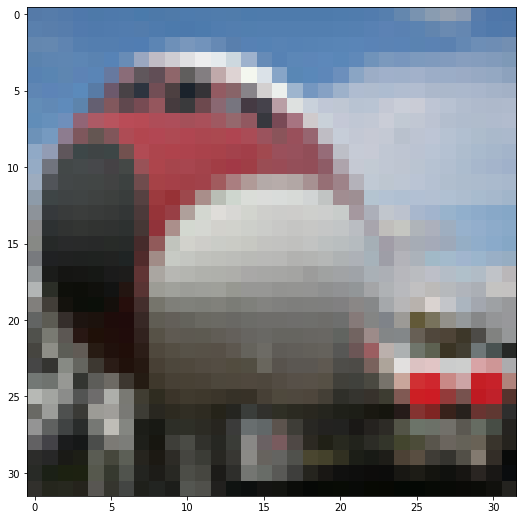


 [8]


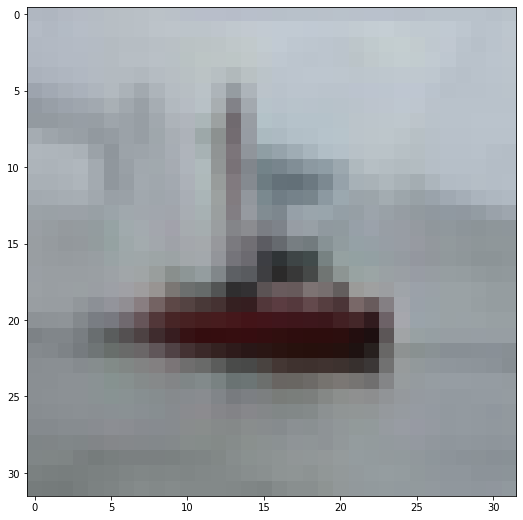


 [3]


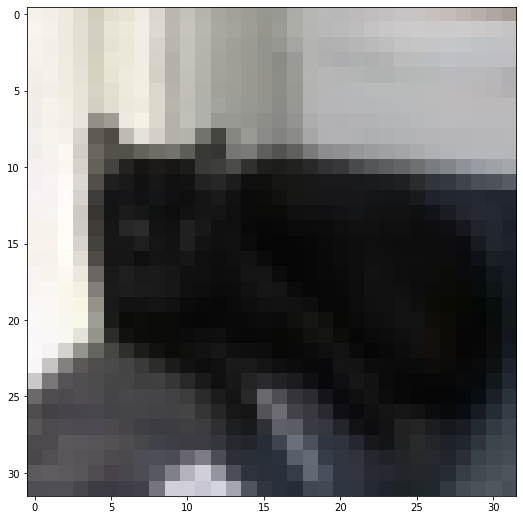


 [5]


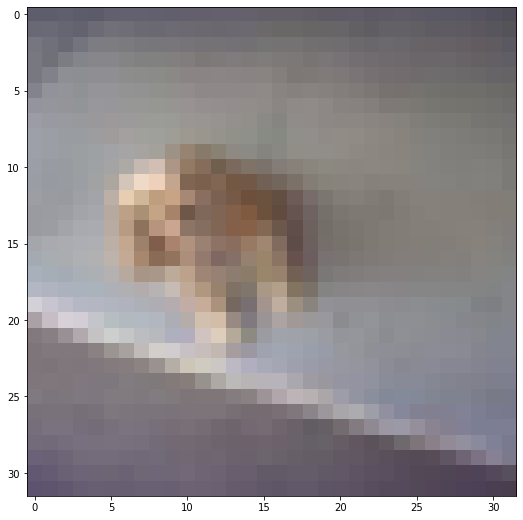


 [7]


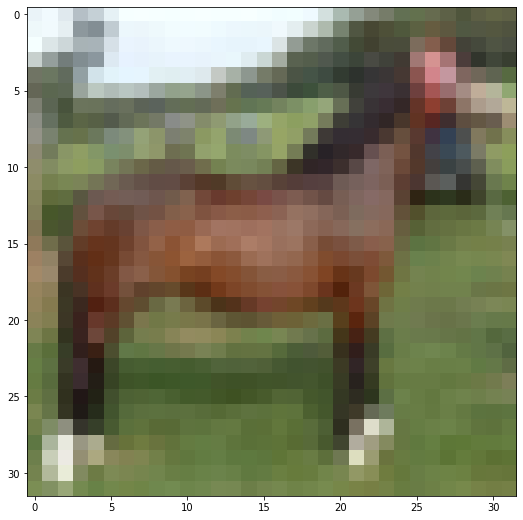

In [26]:
for i in np.random.randint(0, X_train.shape[0], 5):
    print('\n', y_train[i])
    plt.imshow(X_train[i])
    plt.show()

In [27]:


X_train = X_train.astype('float32')
X_test = X_test.astype('float32')


X_train /= 255
X_test /= 255


 [7]


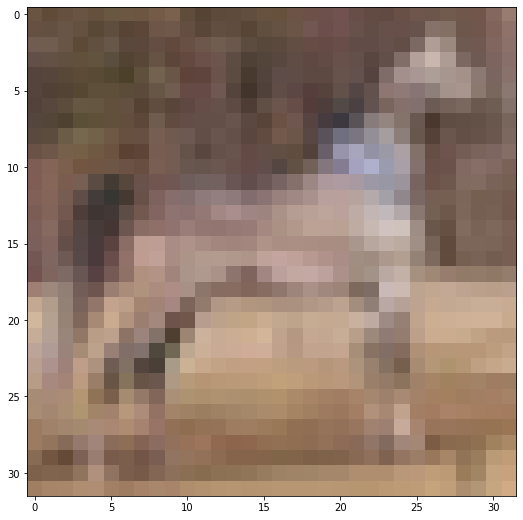


 [0]


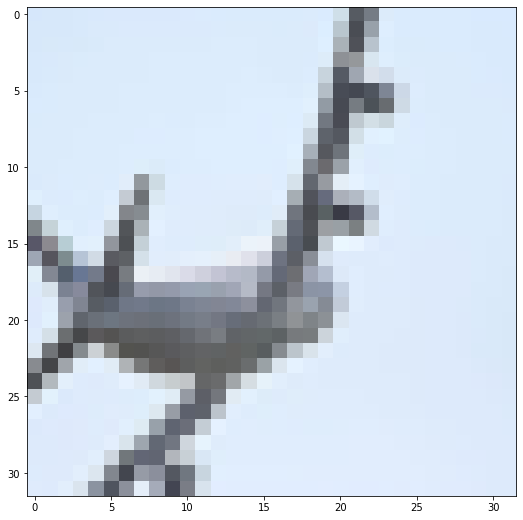


 [5]


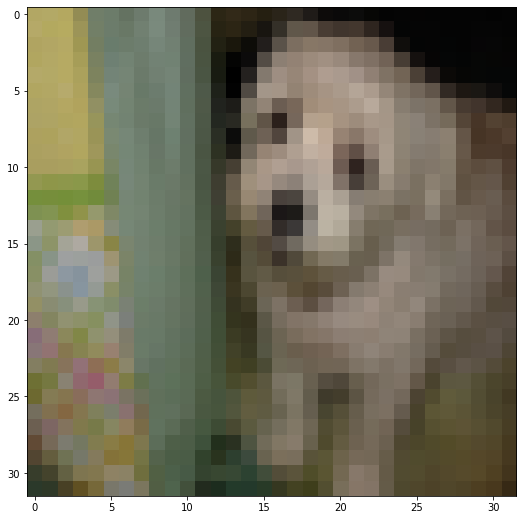


 [6]


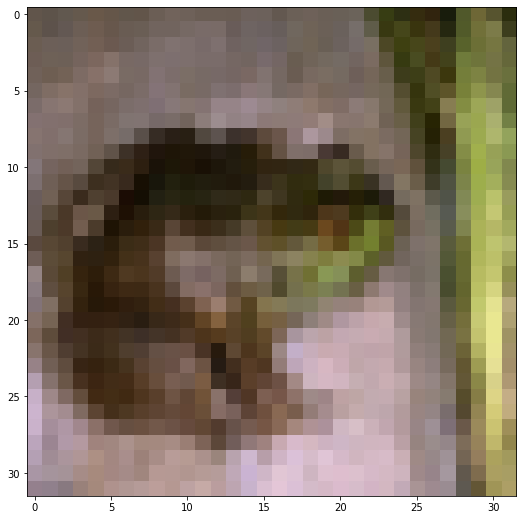


 [0]


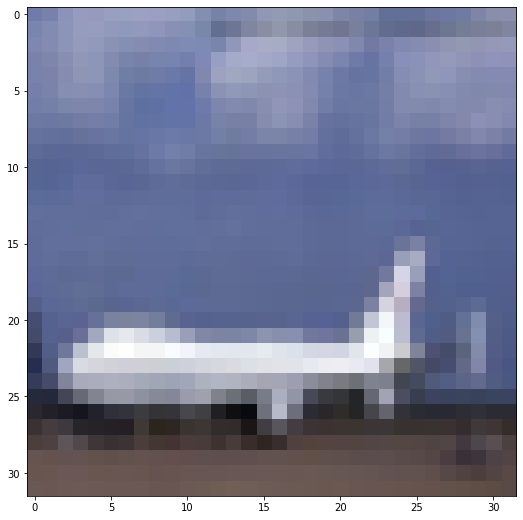


 [4]


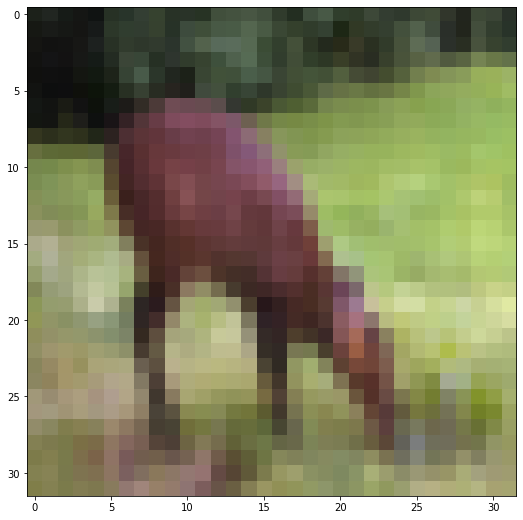


 [0]


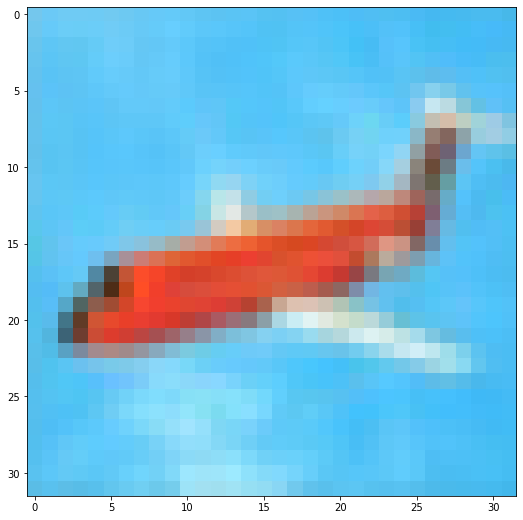


 [6]


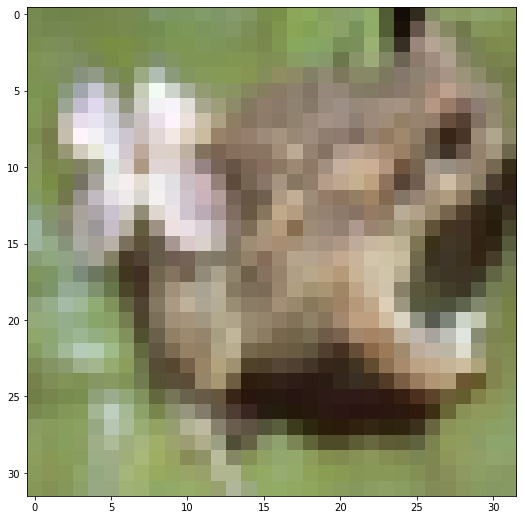


 [3]


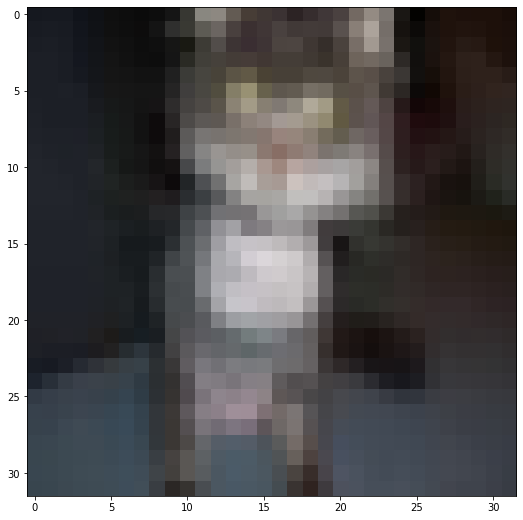


 [0]


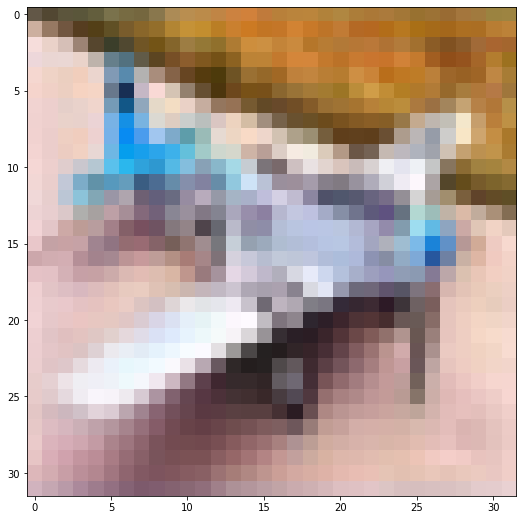

In [28]:
for i in np.random.randint(0, X_train.shape[0], 10):
    print('\n', y_train[i])
    plt.imshow(X_train[i])
    plt.show()

In [29]:
# CNN Architecture

def get_model():
    
    model = Sequential()
    
    model.add(Conv2D(filters=32, kernel_size=(3,3), padding='same', input_shape=input_shape, activation='relu'))
    model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
    model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    model.add(Flatten())
    
    model.add(Dense(units=512, activation='relu'))
    model.add(Dense(units=128, activation='relu'))
    model.add(Dense(units=32, activation='relu'))
    model.add(Dense(units=10, activation='relu'))
    
    model.add(Dense(units=10, activation='softmax'))
    
    print('Model initialized. Please compile before training.')
    
    return model

In [30]:
batch_size = 128
epochs = 100

In [31]:
model_sgd_plain = get_model()

Model initialized. Please compile before training.


In [32]:
model_sgd_plain.summary()
sgd_plain = keras.optimizers.SGD()
model_sgd_plain.compile(loss='sparse_categorical_crossentropy', optimizer=sgd_plain, metrics=['accuracy'])
history_sgd_plain = model_sgd_plain.fit(X_train, y_train, batch_size=batch_size, 
                              epochs=epochs, validation_data=(X_test, y_test), shuffle=True)

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_20 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 30, 30, 32)        9248      
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 13, 13, 64)        18496     
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 1600)             

In [33]:
model_sgd_plain.save('model_sgd_plain.h5')

In [34]:
model_adam = get_model()

Model initialized. Please compile before training.


In [35]:
model_adam.summary()
adam = keras.optimizers.Adam()
model_adam.compile(loss='sparse_categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
history_adam = model_adam.fit(X_train, y_train, batch_size=batch_size, 
                              epochs=epochs, validation_data=(X_test, y_test), shuffle=True)

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_24 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 30, 30, 32)        9248      
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 13, 13, 64)        18496     
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 1600)             

In [36]:
model_adam.save('model_adam.h5')

In [37]:
model_rms = get_model()

Model initialized. Please compile before training.


In [38]:
model_rms.summary()
rmsprop = keras.optimizers.RMSprop()
model_rms.compile(loss='sparse_categorical_crossentropy', optimizer=rmsprop, metrics=['accuracy'])
history_rmsprop = model_rms.fit(X_train, y_train, batch_size=batch_size, 
                              epochs=epochs, validation_data=(X_test, y_test), shuffle=True)

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_28 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 30, 30, 32)        9248      
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_30 (Conv2D)           (None, 13, 13, 64)        18496     
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 1600)             

In [39]:
model_rms.save('model_rms.h5')

In [40]:
model_adadelta = get_model()

Model initialized. Please compile before training.


In [41]:
model_adadelta.summary()
adadelta = keras.optimizers.Adadelta()
model_adadelta.compile(loss='sparse_categorical_crossentropy', optimizer=adadelta, metrics=['accuracy'])
history_adadelta = model_adadelta.fit(X_train, y_train, batch_size=batch_size, 
                              epochs=epochs, validation_data=(X_test, y_test), shuffle=True)

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_32 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_33 (Conv2D)           (None, 30, 30, 32)        9248      
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_34 (Conv2D)           (None, 13, 13, 64)        18496     
_________________________________________________________________
conv2d_35 (Conv2D)           (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_8 (Flatten)          (None, 1600)             

In [42]:
model_adadelta.save('model_adadelta.h5')

In [43]:
model_adagrad = get_model()

Model initialized. Please compile before training.


In [44]:
model_adagrad.summary()
adagrad = keras.optimizers.Adagrad()
model_adagrad.compile(loss='sparse_categorical_crossentropy', optimizer=adagrad, metrics=['accuracy'])
history_adagrad= model_adagrad.fit(X_train, y_train, batch_size=batch_size, 
                              epochs=epochs, validation_data=(X_test, y_test), shuffle=True)

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_36 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_37 (Conv2D)           (None, 30, 30, 32)        9248      
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_38 (Conv2D)           (None, 13, 13, 64)        18496     
_________________________________________________________________
conv2d_39 (Conv2D)           (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_9 (Flatten)          (None, 1600)             

In [ ]:
model_adagrad.save('model_adagrad.h5')

In [ ]:
# Combined Training Accuracy Plot

#print(history_adagrad.history['val_accuracy'])

plt.plot(history_sgd_plain.history['accuracy'])
plt.plot(history_adam.history['accuracy'])
plt.plot(history_rmsprop.history['accuracy'])
plt.plot(history_adadelta.history['accuracy'])
plt.plot(history_adagrad.history['accuracy'])

plt.title('Accuracies')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['SGD', 'Adam', 'RMSprop', 'Adadelta', 'Adagrad'])
plt.savefig('Combined-Accuracy.jpg', dpi=200)

In [ ]:
# SGD
plt.plot(history_sgd_plain.history['accuracy'])
plt.plot(history_sgd_plain.history['val_accuracy'])
plt.title('SGD - Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'])
plt.savefig('SGD-Accuracy.jpg')
plt.show()

print()
print()

plt.plot(history_sgd_plain.history['loss'])
plt.plot(history_sgd_plain.history['val_loss'])
plt.title('SGD - Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'])
plt.savefig('SGD-Loss.jpg')
plt.show()


# Adam
plt.plot(history_adam.history['accuracy'])
plt.plot(history_adam.history['val_accuracy'])
plt.title('Adam - Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'])
plt.savefig('Adam-Accuracy.jpg')
plt.show()

print()
print()

plt.plot(history_adam.history['loss'])
plt.plot(history_adam.history['val_loss'])
plt.title('Adam - Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'])
plt.savefig('Adam-Loss.jpg')
plt.show()

# RMSprop
plt.plot(history_rmsprop.history['accuracy'])
plt.plot(history_rmsprop.history['val_accuracy'])
plt.title('RMSprop - Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'])
plt.savefig('RMSprop-Accuracy.jpg')
plt.show()

print()
print()

plt.plot(history_rmsprop.history['loss'])
plt.plot(history_rmsprop.history['val_loss'])
plt.title('RMSprop - Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'])
plt.savefig('RMSprop-Loss.jpg')
plt.show()

# Adadelta
plt.plot(history_adadelta.history['accuracy'])
plt.plot(history_adadelta.history['val_accuracy'])
plt.title('Adadelta - Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'])
plt.savefig('Adadelta-Accuracy.jpg')
plt.show()

print()
print()

plt.plot(history_adadelta.history['loss'])
plt.plot(history_adadelta.history['val_loss'])
plt.title('Adadelta - Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'])
plt.savefig('Adadelta-Loss.jpg')
plt.show()

# Adagrad
plt.plot(history_adagrad.history['accuracy'])
plt.plot(history_adagrad.history['val_accuracy'])
plt.title('Adagrad - Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'])
plt.savefig('Adagrad-Accuracy.jpg')
plt.show()

print()
print()

plt.plot(history_adagrad.history['loss'])
plt.plot(history_adagrad.history['val_loss'])
plt.title('Adagrad - Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'])
plt.savefig('Adagrad-Loss.jpg')
plt.show()


##**CIFAR10 and MLP architecture**


In [ ]:
from __future__ import print_function
import tensorflow as tf

import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (16.0, 9.0)
import numpy as np

# Seed
np.random.seed(1)

In [ ]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [ ]:
print('X_Train:\t', X_train.shape)
print('y_train:\t', y_train.shape)

print('X_test:\t\t', X_test.shape)
print('y_test:\t\t', y_test.shape)

input_shape = X_train[0].shape
print('\nInput Shape:\t', input_shape)

In [ ]:
for i in np.random.randint(0, X_train.shape[0], 5):
    print('\n', y_train[i])
    plt.imshow(X_train[i])
    plt.show()

In [ ]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')


X_train /= 255
X_test /= 255

In [ ]:
for i in np.random.randint(0, X_train.shape[0], 10):
    print('\n', y_train[i])
    plt.imshow(X_train[i])
    plt.show()

In [ ]:
# MLP Architecture

def get_model():
    
    model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation='softmax')])
    
    print('Model initialized. Please compile before training.')
    
    return model

In [ ]:
batch_size = 128
epochs = 100

In [ ]:
model_sgd_plain = get_model()

In [ ]:
model_sgd_plain.summary()
sgd_plain = keras.optimizers.SGD()
model_sgd_plain.compile(loss='sparse_categorical_crossentropy', optimizer=sgd_plain, metrics=['accuracy'])
history_sgd_plain = model_sgd_plain.fit(X_train, y_train, batch_size=batch_size, 
                              epochs=epochs, validation_data=(X_test, y_test), shuffle=True)

In [ ]:
model_sgd_plain.save('model_sgd_plain.h5')

In [ ]:
model_adam = get_model()

In [ ]:
model_adam.summary()
adam = keras.optimizers.Adam()
model_adam.compile(loss='sparse_categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
history_adam = model_adam.fit(X_train, y_train, batch_size=batch_size, 
                              epochs=epochs, validation_data=(X_test, y_test), shuffle=True)

In [ ]:
model_adam.save('model_adam.h5')

In [ ]:
model_rms = get_model()

In [ ]:
model_rms.summary()
rmsprop = keras.optimizers.RMSprop()
model_rms.compile(loss='sparse_categorical_crossentropy', optimizer=rmsprop, metrics=['accuracy'])
history_rmsprop = model_rms.fit(X_train, y_train, batch_size=batch_size, 
                              epochs=epochs, validation_data=(X_test, y_test), shuffle=True)

In [ ]:
model_rms.save('model_rms.h5')

In [ ]:
model_adadelta = get_model()

In [ ]:
model_adadelta.summary()
adadelta = keras.optimizers.Adadelta()
model_adadelta.compile(loss='sparse_categorical_crossentropy', optimizer=adadelta, metrics=['accuracy'])
history_adadelta = model_adadelta.fit(X_train, y_train, batch_size=batch_size, 
                              epochs=epochs, validation_data=(X_test, y_test), shuffle=True)

In [ ]:
model_adadelta.save('model_adadelta.h5')

In [ ]:
model_adagrad = get_model()

In [ ]:
model_adagrad.summary()
adagrad = keras.optimizers.Adagrad()
model_adagrad.compile(loss='sparse_categorical_crossentropy', optimizer=adagrad, metrics=['accuracy'])
history_adagrad= model_adagrad.fit(X_train, y_train, batch_size=batch_size, 
                              epochs=epochs, validation_data=(X_test, y_test), shuffle=True)

In [ ]:
model_adagrad.save('model_adagrad.h5')

In [ ]:
# Combined Training Accuracy Plot

#print(history_adagrad.history['val_accuracy'])

plt.plot(history_sgd_plain.history['accuracy'])
plt.plot(history_adam.history['accuracy'])
plt.plot(history_rmsprop.history['accuracy'])
plt.plot(history_adadelta.history['accuracy'])
plt.plot(history_adagrad.history['accuracy'])

plt.title('Accuracies')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['SGD', 'Adam', 'RMSprop', 'Adadelta', 'Adagrad'])
plt.savefig('Combined-Accuracy.jpg', dpi=200)

In [ ]:
# SGD
plt.plot(history_sgd_plain.history['accuracy'])
plt.plot(history_sgd_plain.history['val_accuracy'])
plt.title('SGD - Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'])
plt.savefig('SGD-Accuracy.jpg')
plt.show()

print()
print()

plt.plot(history_sgd_plain.history['loss'])
plt.plot(history_sgd_plain.history['val_loss'])
plt.title('SGD - Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'])
plt.savefig('SGD-Loss.jpg')
plt.show()


# Adam
plt.plot(history_adam.history['accuracy'])
plt.plot(history_adam.history['val_accuracy'])
plt.title('Adam - Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'])
plt.savefig('Adam-Accuracy.jpg')
plt.show()

print()
print()

plt.plot(history_adam.history['loss'])
plt.plot(history_adam.history['val_loss'])
plt.title('Adam - Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'])
plt.savefig('Adam-Loss.jpg')
plt.show()

# RMSprop
plt.plot(history_rmsprop.history['accuracy'])
plt.plot(history_rmsprop.history['val_accuracy'])
plt.title('RMSprop - Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'])
plt.savefig('RMSprop-Accuracy.jpg')
plt.show()

print()
print()

plt.plot(history_rmsprop.history['loss'])
plt.plot(history_rmsprop.history['val_loss'])
plt.title('RMSprop - Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'])
plt.savefig('RMSprop-Loss.jpg')
plt.show()

# Adadelta
plt.plot(history_adadelta.history['accuracy'])
plt.plot(history_adadelta.history['val_accuracy'])
plt.title('Adadelta - Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'])
plt.savefig('Adadelta-Accuracy.jpg')
plt.show()

print()
print()

plt.plot(history_adadelta.history['loss'])
plt.plot(history_adadelta.history['val_loss'])
plt.title('Adadelta - Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'])
plt.savefig('Adadelta-Loss.jpg')
plt.show()

# Adagrad
plt.plot(history_adagrad.history['accuracy'])
plt.plot(history_adagrad.history['val_accuracy'])
plt.title('Adagrad - Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'])
plt.savefig('Adagrad-Accuracy.jpg')
plt.show()

print()
print()

plt.plot(history_adagrad.history['loss'])
plt.plot(history_adagrad.history['val_loss'])
plt.title('Adagrad - Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'])
plt.savefig('Adagrad-Loss.jpg')
plt.show()
